In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
Stroke_Data = pd.read_csv('healthcare_dataset_stroke_data.csv')

In [78]:
Stroke_Data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [79]:
Stroke_Data.stroke.value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [80]:
Stroke_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [81]:
Stroke_Data.dropna(inplace = True)

Unique category are 4


<AxesSubplot:xlabel='smoking_status', ylabel='count'>

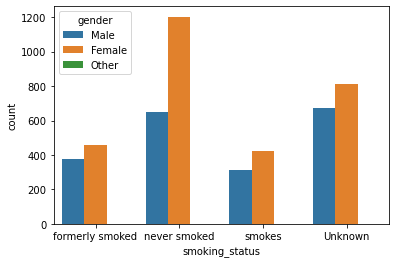

In [82]:
# gender wise smoking status
print("Unique category are", Stroke_Data.smoking_status.nunique())
sns.countplot(data = Stroke_Data, x= Stroke_Data.smoking_status , hue= Stroke_Data.gender)

In [83]:
Stroke_Data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [84]:
Stroke_data = Stroke_Data.drop(columns= ['id'])

In [85]:
Stroke_data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [86]:
Stroke_data.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [87]:
Stroke_data = pd.get_dummies(Stroke_data, columns = ['gender','ever_married','work_type','Residence_type','smoking_status'], drop_first=True)

In [88]:
Stroke_data.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,1,0,1,0,1,0,0,1,1,0,0
2,80.0,0,1,105.92,32.5,1,1,0,1,0,1,0,0,0,0,1,0
3,49.0,0,0,171.23,34.4,1,0,0,1,0,1,0,0,1,0,0,1
4,79.0,1,0,174.12,24.0,1,0,0,1,0,0,1,0,0,0,1,0
5,81.0,0,0,186.21,29.0,1,1,0,1,0,1,0,0,1,1,0,0


In [90]:
def outlier_tretament(x):
    x = x.clip(lower = x.quantile(0.01), upper= x.quantile(0.99) )
    return x
Stroke_data[['age', 'hypertension','heart_disease' , 'bmi' ,'avg_glucose_level' ]] = Stroke_data[['age', 'hypertension','heart_disease' , 'bmi', 'avg_glucose_level']].apply(outlier_tretament)

In [91]:
Stroke_data.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,1,0,1,0,1,0,0,1,1,0,0
2,80.0,0,1,105.92,32.5,1,1,0,1,0,1,0,0,0,0,1,0
3,49.0,0,0,171.23,34.4,1,0,0,1,0,1,0,0,1,0,0,1
4,79.0,1,0,174.12,24.0,1,0,0,1,0,0,1,0,0,0,1,0
5,81.0,0,0,186.21,29.0,1,1,0,1,0,1,0,0,1,1,0,0


In [92]:
X = Stroke_data.drop(columns=['stroke'])
y = Stroke_data.stroke

In [93]:
X.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,0,1,0,1,0,0,1,1,0,0
2,80.0,0,1,105.92,32.5,1,0,1,0,1,0,0,0,0,1,0
3,49.0,0,0,171.23,34.4,0,0,1,0,1,0,0,1,0,0,1
4,79.0,1,0,174.12,24.0,0,0,1,0,0,1,0,0,0,1,0
5,81.0,0,0,186.21,29.0,1,0,1,0,1,0,0,1,1,0,0


In [94]:
y

0       1
2       1
3       1
4       1
5       1
       ..
5104    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 4909, dtype: int64

In [95]:
corr_values = X.corrwith(y)

In [97]:
corr_values.to_csv('corrvalue1.csv')

In [98]:
var_method_1 = ['age',
'hypertension',
'heart_disease',
'avg_glucose_level',
'ever_married_Yes',
'work_type_children',
'smoking_status_formerly smoked',
'work_type_Self-employed',
'bmi'
]

In [99]:
var_method_1

['age',
 'hypertension',
 'heart_disease',
 'avg_glucose_level',
 'ever_married_Yes',
 'work_type_children',
 'smoking_status_formerly smoked',
 'work_type_Self-employed',
 'bmi']

In [100]:
#RFE
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

In [101]:
#create the RFE model and select 9 attributes
rfe = RFE(RandomForestClassifier(), n_features_to_select=9)
rfe = rfe.fit(X, y)

In [102]:
vars_method2 = X.columns[rfe.get_support()].values

In [103]:
vars_method2

array(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'gender_Male', 'work_type_Private', 'Residence_type_Urban',
       'smoking_status_never smoked'], dtype=object)

In [104]:
#F-Regression
# Feature Selection based on importance
from sklearn.feature_selection import chi2
F_values, p_values  = chi2(X, y )

In [105]:
f_reg = pd.concat([pd.Series(X.columns), pd.Series(F_values), pd.Series(p_values)], axis=1)

In [106]:
f_reg.columns = ['var', 'f_val', 'p_val']

In [107]:
vars_method3 = f_reg.sort_values(by='f_val', ascending=False).head(15)['var'].values

In [108]:
s1 = set(var_method_1)
s2 = set(vars_method2)
s3 = set(vars_method3)

In [110]:
final_list = list(s1.union(s2).union(s3))

In [111]:
final_list

['avg_glucose_level',
 'smoking_status_formerly smoked',
 'ever_married_Yes',
 'heart_disease',
 'gender_Male',
 'smoking_status_smokes',
 'hypertension',
 'work_type_Private',
 'work_type_Self-employed',
 'bmi',
 'work_type_Never_worked',
 'work_type_children',
 'smoking_status_never smoked',
 'age',
 'Residence_type_Urban']

In [112]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [113]:
vif_vals = pd.Series([variance_inflation_factor(Stroke_data[list(final_list)].values, i) for i in range(0, len(final_list))])

In [114]:
vif_final = pd.concat([pd.Series(list(final_list)), vif_vals], axis=1)

In [115]:
vif_final.columns = ['var', 'vif']

In [116]:
X_final = X[vif_final.sort_values(by = 'vif', ascending=False)['var'].values]

In [117]:
X_final.shape

(4909, 15)

In [118]:
# Model building

from sklearn.model_selection import train_test_split, GridSearchCV

In [119]:
#Building Random Forest Regressor Model

from sklearn.ensemble import RandomForestClassifier

In [134]:
#X_train,X_test,y_train,y_test = train_test_split(X_final,y,test_size=0.3,random_state=42)

In [135]:
#X_train.shape

In [136]:
#y_train.shape

In [137]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
Xsampled, Ysampled = smote.fit_resample(X_final,y)

In [138]:
X_train,X_test,y_train,y_test = train_test_split(Xsampled,Ysampled,test_size=0.3,random_state=42)

In [139]:
y_train.value_counts()

0    3293
1    3287
Name: stroke, dtype: int64

In [140]:
y_test.value_counts()

1    1413
0    1407
Name: stroke, dtype: int64

In [143]:
Model = RandomForestClassifier()
Model.fit(X_train,y_train)
pred = Model.predict(X_test)

In [144]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95      1407
           1       0.95      0.96      0.96      1413

    accuracy                           0.95      2820
   macro avg       0.95      0.95      0.95      2820
weighted avg       0.95      0.95      0.95      2820

